# 蒙特卡洛仿真

## 什么是蒙特卡洛仿真

蒙特卡洛monte carlo是一个monaco的城市，是世界上最有名的赌城，读破就是一种靠慨率的游戏，
蒙特卡洛仿真也是以来概率和随机的。

大家可以回忆一下什么是随机事件，什么是随机事件的概率。

为什么随机的仿真可以有意义呢？这就是the law of large numbers。
只要我们有足够多的随机样本，我们就能得到真是的期望值。

## 举个例子

我们下面举个简单的例子，加入一间房间里有n个人，求至少有2人生日相同的概率。

这个如果用概率论来接是非常简单的，任意两个人生日相同，情况太多，我们不容易写出来，
我们可以找他的反问题，就是所有人生日都不同，这里我们会发现n一定要小于365，不然一定有人生日相同。
我们继续，如果所有人生日不相同的概率是多少能？

$$
A'=1*\frac{364}{365}*\frac{363}{365}*\frac{362}{365}*...*\frac{365-n+1}{365}
$$

那么相同的概率就是1-A'。

如果我们用monte carlo 仿真怎么求解嫩？
首先我们假设n个人生日随机，然后我们随机生成这n个人的生日，然后看看有没有相同的，
只要我们做很多次，“有相同的次数/总次数”就是我们要求的结果了，下面我们写个python代码来试试：

0.9703735795779884
0.9724


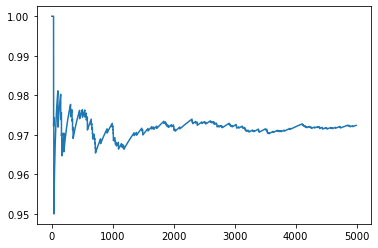

In [4]:
import matplotlib.pyplot as plt
import numpy as np
# 多少人
n = 50
# 计算多少次，越多越精确
iteration = 5000
# 存放每一次的结果
results = []
# 记录有几次有重复生日的人
hit = 0
for i in range(iteration):
    birthdate = np.random.randint(1, 366, n)
    u = np.unique(birthdate)
    if len(u) < len(birthdate):
        hit += 1
    results += [hit/(i+1)]


# 用概率的方法计算理论结果
a = np.arange(365, 365-n, -1)/365
ideal = 1-np.prod(a)
print(ideal)
print(results[-1])
# 画出结果虽计算次数变化曲线
plt.plot(results[5:])



## 作业
下面我们做个联系，假设小明每天早上去上班要做公交车，她早上出门有70%概率坐A路，30%概率坐B路，
A到公司有6站路，每站之间运行2或着3分钟，50%概率随机，然后每站停车0.5或着1分钟，50%概率随机
B到公司有8站路，每站之间运行1或着2分钟，50%概率随机，然后每站停车0.5或着1分钟，50%概率随机，
B车如果连续两站停留1分钟，下一段路一定是0.5分钟路程。
求小平均多长时间到公司，如果小明8点上班，那么他每天几点出门坐车，才能保证90%都不迟到？